In [1]:
# Early WIP

In [36]:
# Standard imports
import os
import numpy as np
import pandas as pd
import quandl
from datetime import datetime
import pickle

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
})

# Colour management
MC = '#242a49'  # Main colour
SC = 'red'  # Secondary colour
grid_params = {'color': MC, 'alpha': .1}

output_notebook()
%matplotlib inline

Loading BokehJS ...

In [7]:
# Versions of packages
import pkg_resources
print(pkg_resources.get_distribution('numpy'))
print(pkg_resources.get_distribution('pandas'))
print(pkg_resources.get_distribution('quandl'))
print(pkg_resources.get_distribution('matplotlib'))

numpy 1.13.3
pandas 0.21.0
Quandl 3.2.1
matplotlib 2.0.2


In [8]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/', '-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns='pandas')
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [9]:
# Pull Kraken BTC price exchange data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


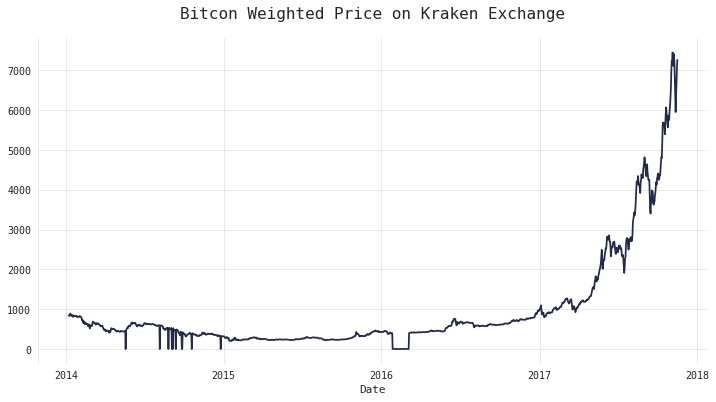

In [38]:
plt.figure(figsize=(12, 6))
plt.axes(frameon=False)
btc_usd_price_kraken['Weighted Price'].plot(ax=plt.gca(), color=MC)
plt.grid(**grid_params)
plt.title('Bitcon Weighted Price on Kraken Exchange', fontsize=16, y=1.04);

In [43]:
# Pull pricing data from more BTC exchanges
exchanges = ['COINBASE', 'BITSTAMP', 'ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache


In [47]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [48]:
# Merge the BTC price dataseries' into a single dataframe
btc_usd_datasets = merge_dfs_on_column(list(exchange_data.values()), 
                                       list(exchange_data.keys()), 
                                       'Weighted Price')

In [50]:
btc_usd_datasets.tail(2)

,BITSTAMP,COINBASE,ITBIT,KRAKEN
Date,,,,
2017-11-15,"7,064.13","7,063.48","7,014.32","7,081.23"
2017-11-16,"7,294.79","7,294.00","7,292.97","7,260.60"


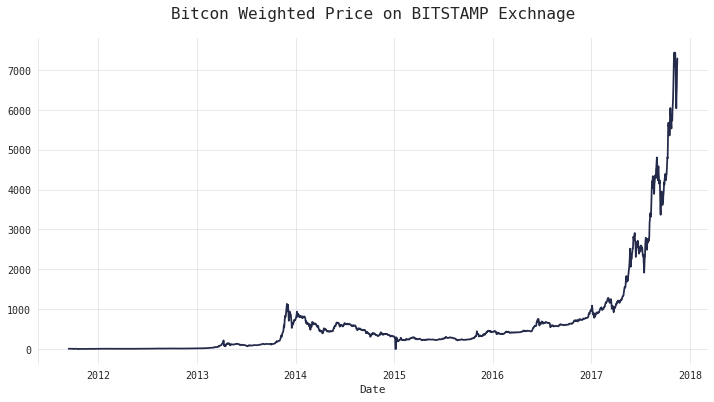

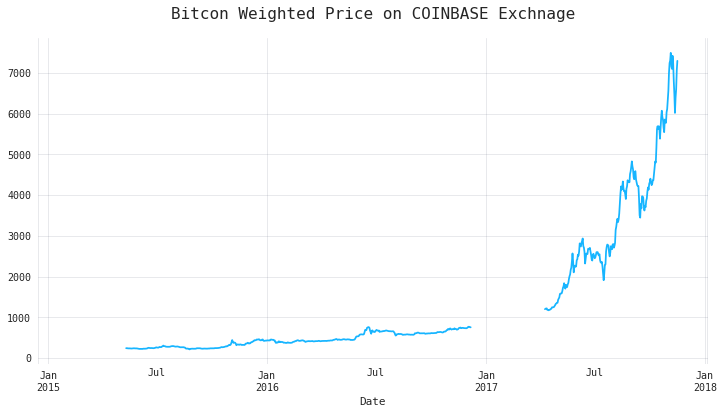

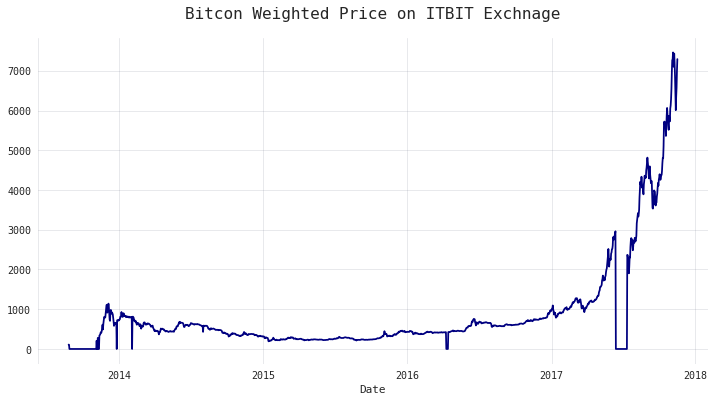

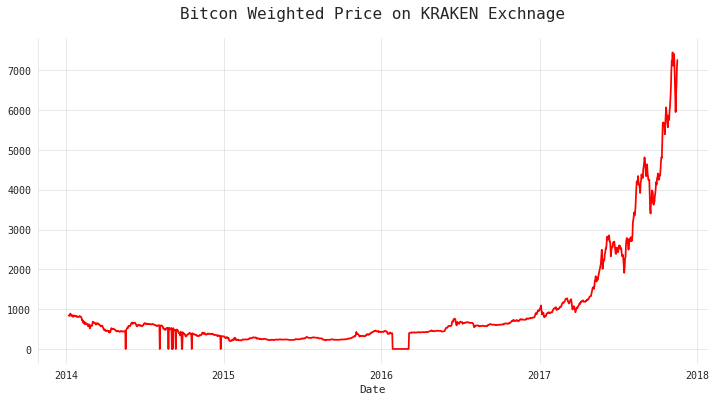

In [59]:
colors = [MC, '#17b5ff', 'navy', 'red']

for i, exchange in enumerate(btc_usd_datasets.columns):
    plt.figure(figsize=(12, 6))
    plt.axes(frameon=False)
    btc_usd_datasets[exchange].plot(ax=plt.gca(), color=colors[i])
    plt.grid(**grid_params)
    plt.title('Bitcon Weighted Price on {} Exchnage'.format(exchange), fontsize=16, y=1.04);

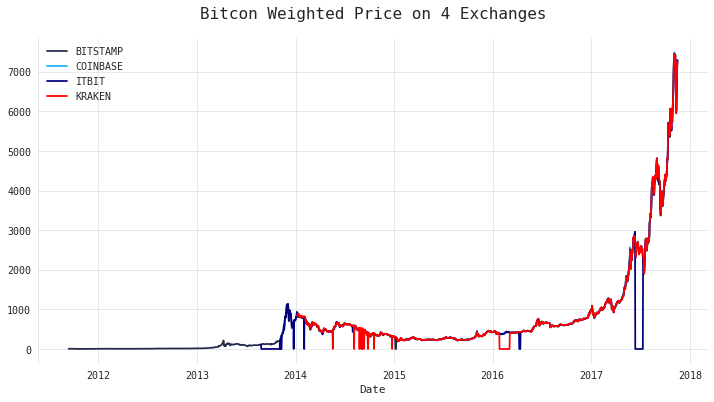

In [57]:
colors = [MC, '#17b5ff', 'navy', 'red']
plt.figure(figsize=(12, 6))
plt.axes(frameon=False)
btc_usd_datasets.plot(ax=plt.gca(), color=colors)
plt.grid(**grid_params)
plt.title('Bitcon Weighted Price on 4 Exchanges', fontsize=16, y=1.04);

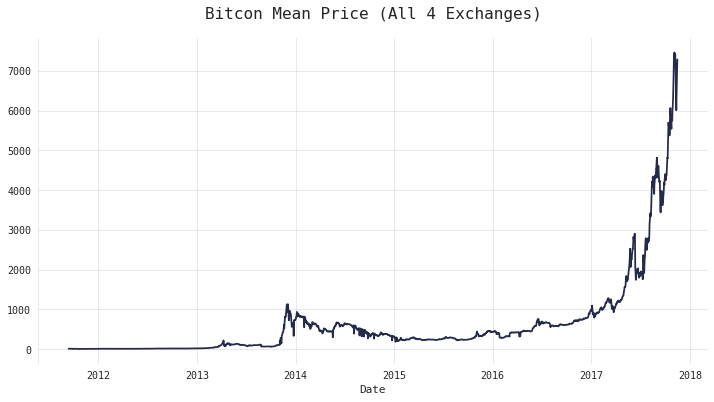

In [64]:
# Mean price on all 4 exchanges
plt.figure(figsize=(12, 6))
plt.axes(frameon=False)
btc_usd_datasets.mean(axis=1).plot(ax=plt.gca(), color=MC)
plt.grid(**grid_params)
plt.title('Bitcon Mean Price (All 4 Exchanges)', fontsize=16, y=1.04);

In [65]:
def get_json_data(json_url, cache_path):
    '''Download and cache JSON data, return as a dataframe.'''
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)
        print('Loaded {} from cache'.format(json_url))
    except (OSError, IOError) as e:
        print('Downloading {}'.format(json_url))
        df = pd.read_json(json_url)
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(json_url, cache_path))
    return df